In [1]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt
import H_generator
from GFE import GFE_circuit

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Initialization

In [3]:
# Circuit initialization
QC_6 = GFE_circuit()
QC_8 = GFE_circuit()
QC_10 = GFE_circuit()

# set the initial discrete parameters
dy, My = 0.08, 30
QC_6.set_discrete_parameters(dy, My)
QC_8.set_discrete_parameters(dy, My)
QC_10.set_discrete_parameters(dy, My)

# Generate the Hamiltonian
N = 6
J = 1
g = 2
shift_E = 13
H_6 = H_generator.build_Ising_model(N, J, g, shift_E)
h_list_6 = H_generator.Ising_model_decomposition(N, J, g, shift_E)
E_exact_6 = H_6.eigenenergies()[0]
QC_6.set_Hamiltonian(H_6)
QC_6.set_local_operator_list(h_list_6)

N = 8
shift_E = 17.3
H_8 = H_generator.build_Ising_model(N, J, g, shift_E)
h_list_8 = H_generator.Ising_model_decomposition(N, J, g, shift_E)
E_exact_8 = H_8.eigenenergies()[0]
QC_8.set_Hamiltonian(H_8)
QC_8.set_local_operator_list(h_list_8)

N = 10
shift_E = 21.5
H_10 = H_generator.build_Ising_model(N, J, g, shift_E)
h_list_10 = H_generator.Ising_model_decomposition(N, J, g, shift_E)
E_exact_10 = H_10.eigenenergies()[0]
QC_10.set_Hamiltonian(H_10)
QC_10.set_local_operator_list(h_list_10)

In [4]:
# Generate random initial state
for N in [6, 8, 10]:
    QC_6.gen_rand_initial_state(QC_6.h_list, 1)
    QC_8.gen_rand_initial_state(QC_8.h_list, 1)
    QC_10.gen_rand_initial_state(QC_10.h_list, 1)
ini_state_list = [QC_6.ini_state, QC_8.ini_state, QC_10.ini_state]
qp.fileio.qsave(ini_state_list, './data/rand_ini_state_for_iterative_simulation')

In [5]:
# Load the saved random initial state
ini_state_list = qp.fileio.qload('./data/rand_ini_state_for_iterative_simulation')
QC_6.set_initial_state(ini_state_list[0])
QC_8.set_initial_state(ini_state_list[1])
QC_10.set_initial_state(ini_state_list[2])

Loaded list object.


In [6]:
My_list = np.arange(30, 135, 20)
max_phase_list = My_list*0.08

In [7]:
def serach_min_E(QC, num_list, den_list, mu_list, inv_sig_squ_list):
    '''
    Scanning the Gaussian filter parameters to obtain the minimum energy.
    
    Parameters
    ----------
    QC (GFE obj): quantum circuit.
    num_list (list): list of numerator terms.
    den_list (list): list of denominator terms.
    mu_list (list): list of mu to scan.
    inv_sig_squ_list(list): list of inverse sigma square to scan.
    ----------
    '''
    
    E_est_list = []
    for mu in mu_list:
        for inv_sig_squ in inv_sig_squ_list:
            # Scan the Gaussian filter parameter list
            QC.set_Gaussian_parameters(1/inv_sig_squ, mu) # set Gaussian filter parameter
            by_list = QC.generate_coefficient() # generate coefficient
            E_est = QC.compute_E(by_list, num_list, den_list) # estimate energy
            E_est_list.append(E_est)
    E_est_list = abs(np.array(E_est_list)) # compute absolute value of estimated energy
    E_est_min = min(E_est_list) # the minimum energy
    
    return E_est_min

# Process

## 6 qubits case

In [8]:
E_est_list_6 = [] # store the estimated energy

# Gaussian filter to scan
inv_sig_squ_list = np.arange(1, 3, 0.3)
mu_list = E_exact_6 + np.arange(0, -1, -0.1)

# Compute the initial list
num_list, den_list = QC_6.directly_compute_overlaps()
# scan the Gaussian filter parameters to obtain the minimum energy
E_est = serach_min_E(QC_6, num_list, den_list, mu_list, inv_sig_squ_list)
print('Max_phase:' + "{:.2f}".format(QC_6.My*QC_6.dy) + ', Estimation error:' + str(E_est - E_exact_6))

Max_phase:2.40, Estimation error:0.0360296396856232


In [9]:
for My in My_list:
    pre_overlaps = [num_list, den_list] # previous overlap information
    # update the overlap information after updating the discrete parameters
    num_list, den_list = QC_6.directly_compute_additional_overlaps(pre_overlaps, My, dy)
    # solve the estimated energy and store it to the list
    E_est = serach_min_E(QC_6, num_list, den_list, mu_list, inv_sig_squ_list)
    E_est_list_6.append(E_est)
    print('Max_phase:' + "{:.2f}".format(QC_6.My*QC_6.dy) + ', Estimation error:' + str(E_est - E_exact_6))

Max_phase:2.40, Estimation error:0.0360296396856232
Max_phase:4.00, Estimation error:0.00022059235519550358
Max_phase:5.60, Estimation error:7.04443559512713e-07
Max_phase:7.20, Estimation error:1.0581331477688138e-08
Max_phase:8.80, Estimation error:1.049629827498677e-10
Max_phase:10.40, Estimation error:5.913630696241512e-12


## 8 qubis case

In [10]:
E_est_list_8 = [] # store the estimated energy

# Gaussian filter to scan
inv_sig_squ_list = np.arange(1, 3, 0.3)
mu_list = E_exact_8 + np.arange(0, -1, -0.1)

# Compute the initial list
num_list, den_list = QC_8.directly_compute_overlaps()
# scan the Gaussian filter parameters to obtain the minimum energy
E_est = serach_min_E(QC_8, num_list, den_list, mu_list, inv_sig_squ_list)
print('Max_phase:' + "{:.2f}".format(QC_8.My*QC_8.dy) + ', Estimation error:' + str(E_est - E_exact_8))

Max_phase:2.40, Estimation error:0.18147968122430624


In [11]:
for My in My_list:
    pre_overlaps = [num_list, den_list] # previous overlap information
    # update the overlap information after updating the discrete parameters
    num_list, den_list = QC_8.directly_compute_additional_overlaps(pre_overlaps, My, dy)
    # solve the estimated energy and store it to the list
    E_est = serach_min_E(QC_8, num_list, den_list, mu_list, inv_sig_squ_list)
    E_est_list_8.append(E_est)
    print('Max_phase:' + "{:.2f}".format(QC_8.My*QC_8.dy) + ', Estimation error:' + str(E_est - E_exact_8))

Max_phase:2.40, Estimation error:0.18147968122430624
Max_phase:4.00, Estimation error:0.0009173369849156954
Max_phase:5.60, Estimation error:8.189490928733889e-07
Max_phase:7.20, Estimation error:1.303617663817036e-08
Max_phase:8.80, Estimation error:1.8230622567116939e-10
Max_phase:10.40, Estimation error:7.377876087844015e-12


## 10 qubit case

In [12]:
E_est_list_10 = [] # store the estimated energy

# Gaussian filter to scan
inv_sig_squ_list = np.arange(1, 3, 0.3)
mu_list = E_exact_10 + np.arange(0, -1, -0.1)

# Compute the initial list
num_list, den_list = QC_10.directly_compute_overlaps()
# scan the Gaussian filter parameters to obtain the minimum energy
E_est = serach_min_E(QC_10, num_list, den_list, mu_list, inv_sig_squ_list)
print('Max_phase:' + "{:.2f}".format(QC_10.My*QC_10.dy) + ', Estimation error:' + str(E_est - E_exact_10))

Max_phase:2.40, Estimation error:1.1758127975931914


In [13]:
for My in My_list:
    pre_overlaps = [num_list, den_list] # previous overlap information
    # update the overlap information after updating the discrete parameters
    num_list, den_list = QC_10.directly_compute_additional_overlaps(pre_overlaps, My, dy)
    # solve the estimated energy and store it to the list
    E_est = serach_min_E(QC_10, num_list, den_list, mu_list, inv_sig_squ_list)
    E_est_list_10.append(E_est)
    print('Max_phase:' + "{:.2f}".format(QC_10.My*QC_10.dy) + ', Estimation error:' + str(E_est - E_exact_10))

Max_phase:2.40, Estimation error:1.1758127975931914
Max_phase:4.00, Estimation error:0.006737978813972922
Max_phase:5.60, Estimation error:6.197386113321324e-06
Max_phase:7.20, Estimation error:5.8013890857910866e-08
Max_phase:8.80, Estimation error:8.95478691198548e-10
Max_phase:10.40, Estimation error:1.3206183369085522e-10


# Plot figure

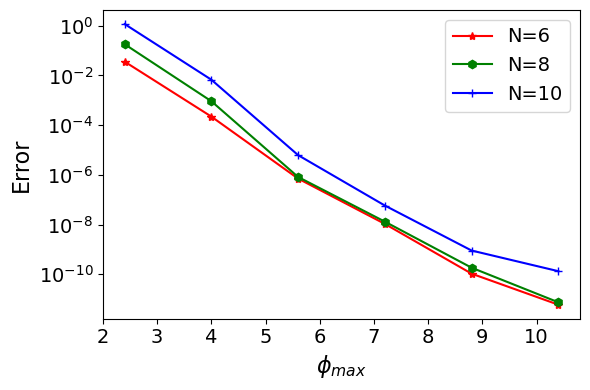

In [14]:
fig = plt.figure(figsize = [6, 4])
plt.plot(max_phase_list, E_est_list_6 - E_exact_6, 'r-*', label='N=6')
plt.plot(max_phase_list, E_est_list_8 - E_exact_8, 'g-h', label='N=8')
plt.plot(max_phase_list, E_est_list_10 - E_exact_10, 'b-+', label='N=10')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlabel('$\phi_{max}$',fontsize=16)
plt.ylabel('Error',fontsize=16)
plt.yscale('log')

plt.tight_layout()
plt.show()
fig.savefig("./figures/Ising_qubit_6_8_10_random_ini_E_vs_max_phase", dpi = 300, bbox_inches = 'tight')